In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lmfit # este sirve para no linear "Non-Linear Least-Squares Minimization and Curve-Fitting"
from scipy import signal

# ATOMO DE MERCURIO OBSERVACIONES

In [2]:
data = pd.read_excel("datos_mercurio.xlsx")
data 

,Parametros:,U1=60 V,Unnamed: 2,Unnamed: 3,Voltage U1,Corriente IA,Corriente IA.1,Corriente IA.2,Corriente IA.3,Corriente IA.4,Corriente IA.5,Corriente IA.6,Corriente IA.7,Corriente IA.8,Corriente IA.9,Corriente IA.10,Corriente IA.11
0,NaN,U2=2 V,NaN,NaN,U1/V,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA,IA/nA
1,NaN,UH= 6.3 V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,T=175 °C,NaN,NaN,NaN,A,B,C,D,E,F,G,H,I,J,K,L
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.02,0.01,0.011,0.0015,0.002,0,0.34,0.31,0.51,0.04,0.02,0.05,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,NaN,NaN,NaN,NaN,59.9,8.19,9.009,1.2285,1.638,8.52,8.52,7.97,8.69,8.22,8.2,8.23,7.97
2457,NaN,NaN,NaN,NaN,59.92,8.3,9.13,1.245,1.66,8.63,8.63,7.97,8.8,8.33,8.31,8.34,7.97
2458,NaN,NaN,NaN,NaN,59.95,8.36,9.196,1.254,1.672,8.69,8.69,7.97,8.86,8.39,8.37,8.4,7.97
2459,NaN,NaN,NaN,NaN,59.97,8.44,9.284,1.266,1.688,8.77,8.77,7.97,8.94,8.47,8.45,8.48,7.97


### columnas que vamos a eliminar 

In [147]:
# que columnas vamos a elimina
data.columns[[0,1,2,3]]

Index(['Parametros:', 'U1=60 V', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [3]:
# eliminamos las filas y columnas que no queremos
data = data.drop([0,1,2,3],axis=0) # elimina las 4 primeras filas
data = data.drop(data.columns[[0,1,2,3]],axis=1) # elimina las 4 primeras columnas

# Lo que hacemos ahora es resetear indices para no tener problemas luego en la elaboracion
data = data.reset_index(drop=True)
data

,Voltage U1,Corriente IA,Corriente IA.1,Corriente IA.2,Corriente IA.3,Corriente IA.4,Corriente IA.5,Corriente IA.6,Corriente IA.7,Corriente IA.8,Corriente IA.9,Corriente IA.10,Corriente IA.11
0,0.02,0.01,0.011,0.0015,0.002,0,0.34,0.31,0.51,0.04,0.02,0.05,0.51
1,0.04,0.01,0.011,0.0015,0.002,0,0.34,0.31,0.51,0.04,0.02,0.05,0.51
2,0.07,0.01,0.011,0.0015,0.002,0,0.34,0.31,0.51,0.04,0.02,0.05,0.51
3,0.09,0.01,0.011,0.0015,0.002,0,0.34,0.31,0.51,0.04,0.02,0.05,0.51
4,0.12,0.01,0.011,0.0015,0.002,0,0.34,0.31,0.51,0.04,0.02,0.05,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,59.9,8.19,9.009,1.2285,1.638,8.52,8.52,7.97,8.69,8.22,8.2,8.23,7.97
2453,59.92,8.3,9.13,1.245,1.66,8.63,8.63,7.97,8.8,8.33,8.31,8.34,7.97
2454,59.95,8.36,9.196,1.254,1.672,8.69,8.69,7.97,8.86,8.39,8.37,8.4,7.97
2455,59.97,8.44,9.284,1.266,1.688,8.77,8.77,7.97,8.94,8.47,8.45,8.48,7.97


# EXTRACCION DE DATOS

In [153]:
list(range(1,len(data.columns)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [4]:
lista_de_datas_Hg = [] # la lista de datas
for i in range(1,len(data.columns)):
    lista_de_datas_Hg.append(data.iloc[0:,[0,i]])

# GRAFICA DE DATOS PARA Hg

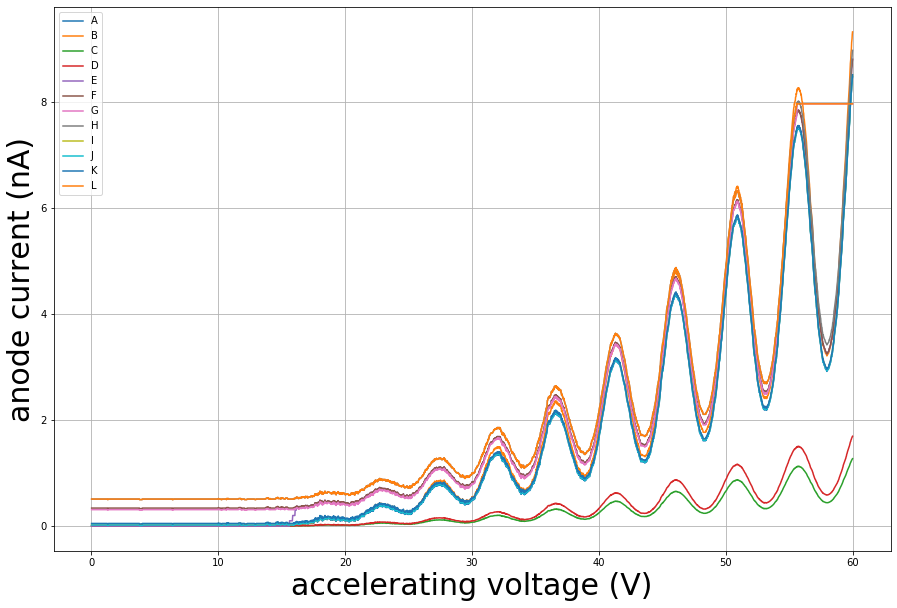

In [13]:
plt.figure(figsize=(15,10))
# El for va por todas las listas y en paralelo va de "A" hacia "L" indicado en la tabla de datos
for datos,i in zip(lista_de_datas_Hg,range(ord("A"),ord("L")+1)):
    plt.plot(datos.iloc[0:,0],datos.iloc[0:,1],label=f"{chr(i)}")

#### decoraciones 
plt.grid()
plt.xlabel('accelerating voltage (V)',fontsize=30)
plt.ylabel('anode current (nA)',fontsize=30)
plt.legend()
plt.show()

## Funcion que halla minimos maximo para un juego de datos para luego calcular el voltaje minimo donde ocurre los choques elasticos. 

In [6]:
def calculos(datos=None,Vmin=26,cercania=150,texto=None):
    
    print("#\t"*5+f"{texto}"+"\t#"*5)
    # U_1 = voltaje de aceleración
    # U_2 = voltaje de frenado 
    # corr_0 = corrientes de las columnas
    
    ################# Hallamos los picos y valles y graficamos ##############
    ### Extraemos 
    data1 = datos
    U1 = data1.iloc[0:,0].to_numpy() # para la proxima reduccion
    
    #### Eliminamos valores para que tengamos valores importantes con lo que podamos trabajar
    boolen = U1 > Vmin
    data1 = data1[boolen] # extraemos las filas importantes
    data1 = data1.reset_index(drop=True) # reseteamos

    ### Extraemos
    U1 = data1.iloc[0:,0].to_numpy()
    corr_0 = data1.iloc[0:,1].to_numpy()

    ###### Encontramos los picos y valles
    peaks, _ = signal.find_peaks(corr_0, distance=cercania) # te da donde se encuentra los picos en "corr_0" por posiciones 
    troughs, _ = signal.find_peaks(x=-corr_0, distance=cercania)

    V_peaks, I_peaks = data1.iloc[peaks,[0,1]].values.T # los picos los extraemos de la dataset
    V_troughs, I_troughs = data1.iloc[troughs,[0,1]].values.T # los valles lo extraemos de la dataset

    plt.plot(V_peaks, I_peaks, 'bo',label="picos") # dibujamos los pricos
    plt.plot(V_troughs, I_troughs, 'ro',label="valles") # dibujamos los valles
    plt.plot(U1,corr_0)
    #### decoraciones 
    plt.legend() # para las etiquetas
    plt.grid()
    plt.xlabel('accelerating voltage (V)',fontsize=20)
    plt.ylabel('anode current (nA)',fontsize=20)
    plt.show()

    ############################# Buscamos el voltaje Minimo de exitacion ##################
    ### Lo ponemos todo juntos
    # Peak statistics
    dV_peaks = np.diff(V_peaks)
    dV_peaks_avg = dV_peaks.mean()
    dV_peaks_std = dV_peaks.std() / np.sqrt(len(peaks))

    # Trough statistics
    dV_troughs = np.diff(V_troughs)
    dV_troughs_avg = dV_troughs.mean()
    dV_troughs_std = dV_troughs.std() / np.sqrt(len(troughs))

    # Average the averages
    dV_avg = np.mean([dV_peaks_avg, dV_troughs_avg])
    dV_std = np.hypot(dV_peaks_std, dV_troughs_std)

    # Print a summary
    print(f"Average splitting (peaks): {dV_peaks_avg:.3f} +/- {dV_peaks_std:.3f} V")
    print(f"Average splitting (troughs): {dV_troughs_avg:.3f} +/- {dV_troughs_std:.3f} V")
    print(f"Average splitting (combined): {dV_avg:.3f} +/- {dV_std:.3f} V")
    
    ################# Comprobamos la linealidad ############################
    plt.plot(V_peaks, 'ro', label='peaks')
    plt.plot(V_troughs, 'bo', label='troughs')
    plt.xlabel('peak number',fontsize=20)
    plt.ylabel('accelerating voltage (V)',fontsize=20)
    plt.legend(shadow=True)
    plt.grid()
    plt.show()
    
    #################### Detallamos parametros ########################
    
    linear = lmfit.models.LinearModel()
    
    # Fit to the peak locations
    peak_fit = linear.fit(list(V_peaks), x=np.arange(len(V_peaks)))
    fig, gs = peak_fit.plot()
    
    fig.axes[1].grid()
    fig.axes[1].set_xlabel('peak number',fontsize=20)
    fig.axes[1].set_ylabel('accelerating voltage (V)',fontsize=20)
    fig.axes[0].set_title("data" + ' (peaks)',fontsize=20)
    plt.show()

    print(peak_fit.fit_report())

    # Fit to the trough locations
    trough_fit = linear.fit(list(V_troughs), x=np.arange(len(V_troughs)))
    fig, gs = trough_fit.plot()
    fig.axes[1].grid()
    fig.axes[1].set_xlabel('trough number',fontsize=20)
    fig.axes[1].set_ylabel('accelerating voltage (V)',fontsize=20)
    fig.axes[0].set_title("data" + ' (troughs)',fontsize=20)
    plt.show()

    print(trough_fit.fit_report())

# Hacemos calculos de todas los juegos de Datos

#	#	#	#	#	Calculos del juego A	#	#	#	#	#


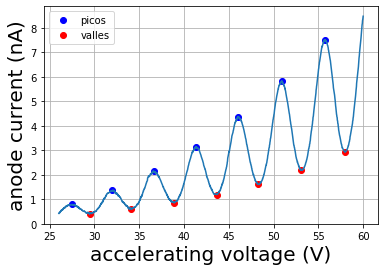

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


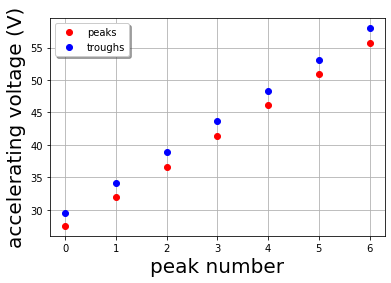

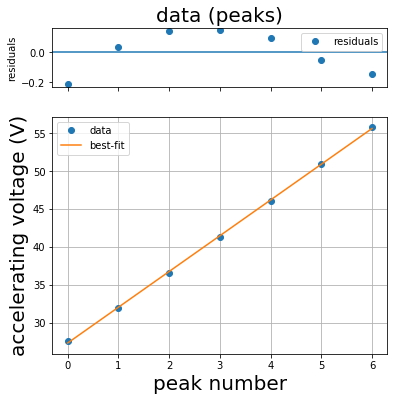

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


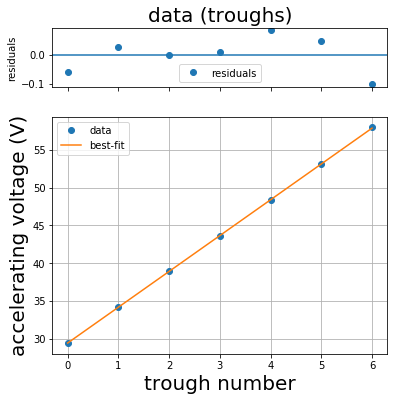

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego B	#	#	#	#	#


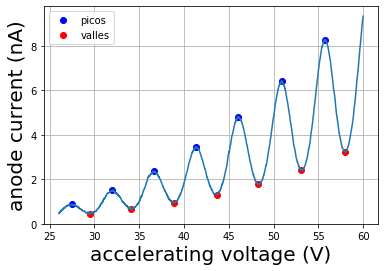

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


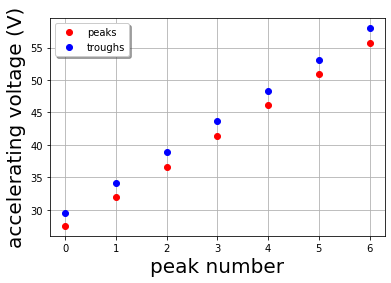

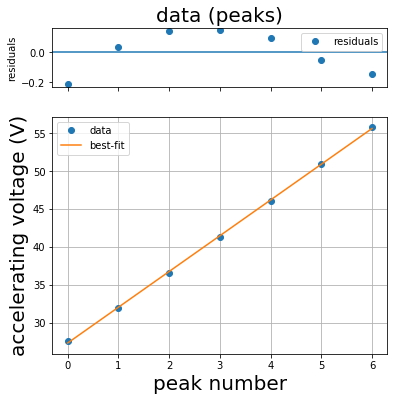

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


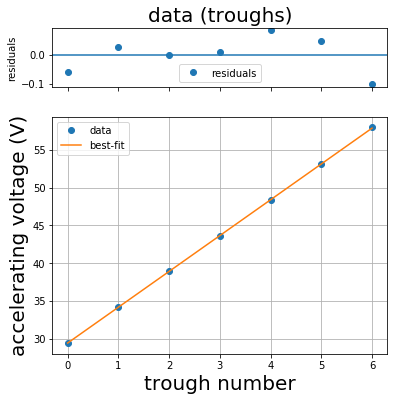

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego C	#	#	#	#	#


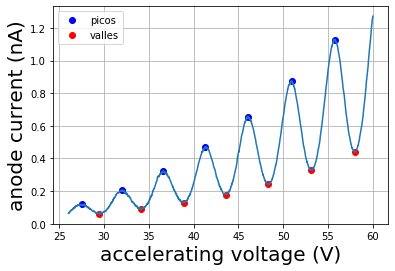

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


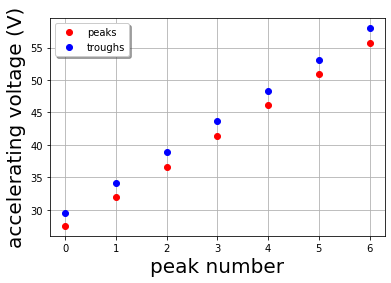

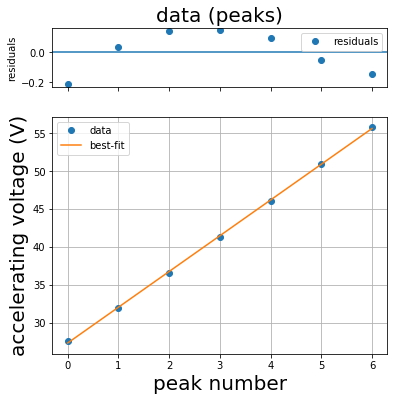

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


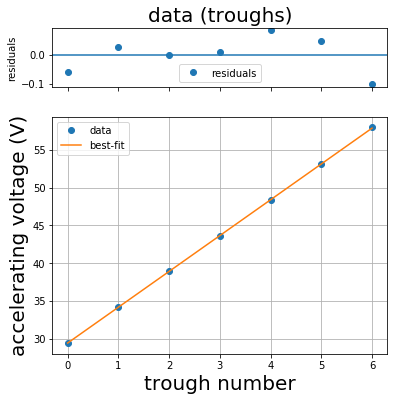

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego D	#	#	#	#	#


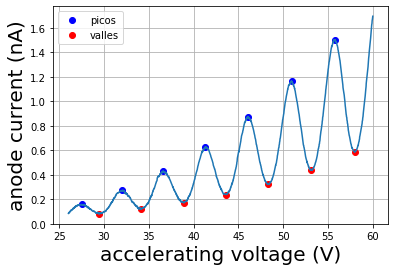

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


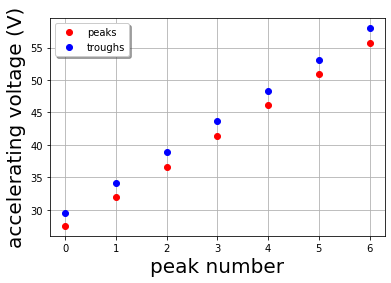

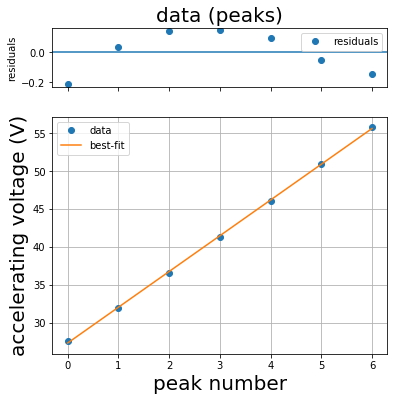

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


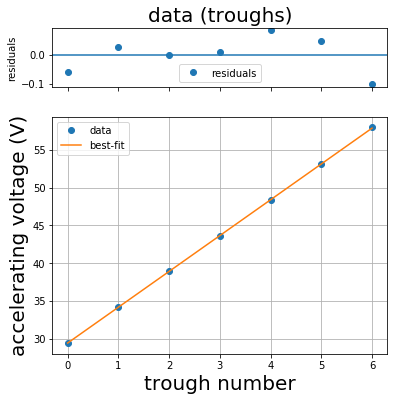

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego E	#	#	#	#	#


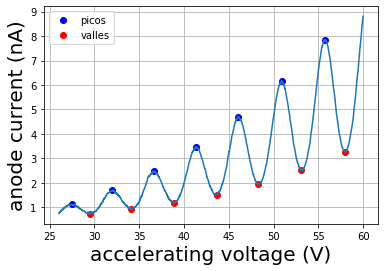

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


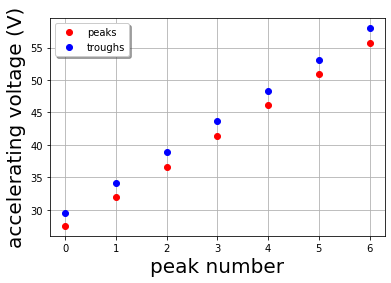

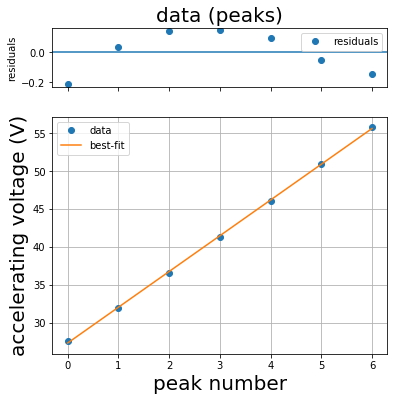

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


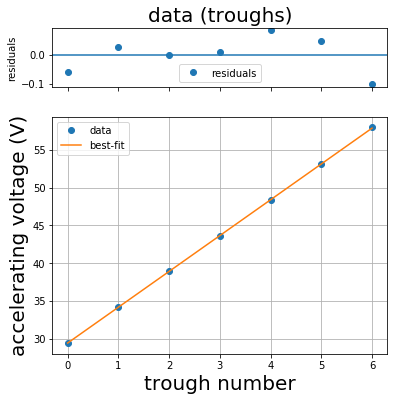

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego F	#	#	#	#	#


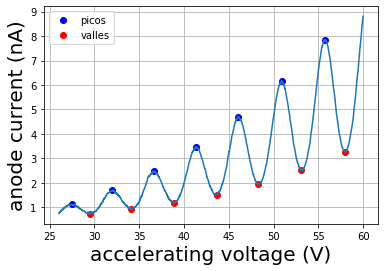

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


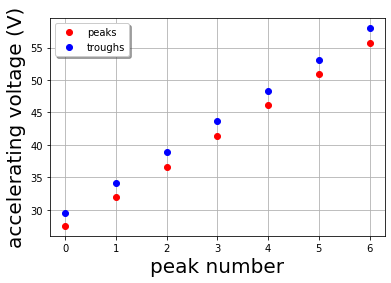

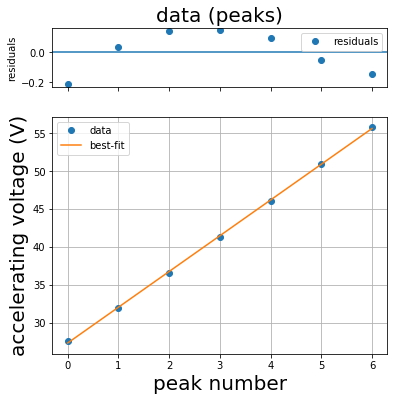

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


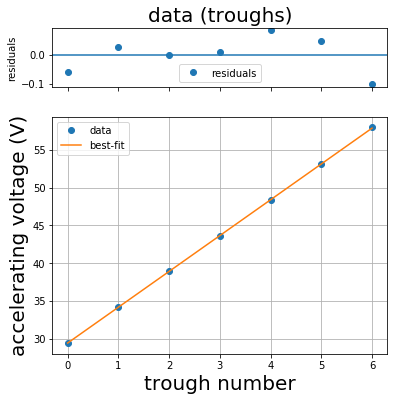

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego G	#	#	#	#	#


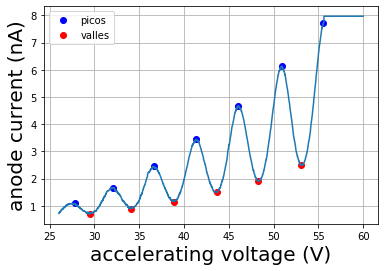

Average splitting (peaks): 4.623 +/- 0.077 V
Average splitting (troughs): 4.722 +/- 0.020 V
Average splitting (combined): 4.673 +/- 0.080 V


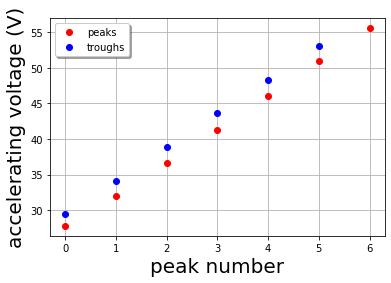

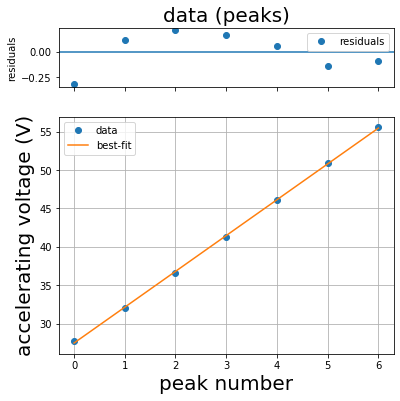

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.22131429
    reduced chi-square = 0.04426286
    Akaike info crit   = -20.1785714
    Bayesian info crit = -20.2867511
[[Variables]]
    slope:      4.66142857 +/- 0.03975948 (0.85%) (init = 1)
    intercept:  27.4900000 +/- 0.14335485 (0.52%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


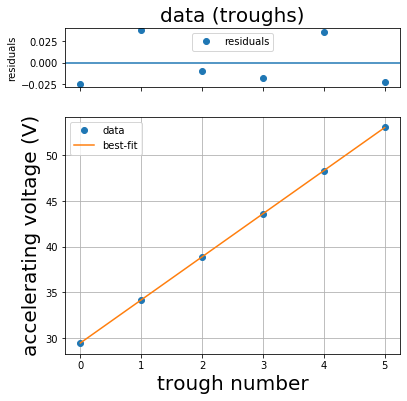

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 0.00416762
    reduced chi-square = 0.00104190
    Akaike info crit   = -39.6330191
    Bayesian info crit = -40.0495001
[[Variables]]
    slope:      4.72257143 +/- 0.00771605 (0.16%) (init = 1)
    intercept:  29.4452381 +/- 0.02336150 (0.08%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.826
#	#	#	#	#	Calculos del juego H	#	#	#	#	#


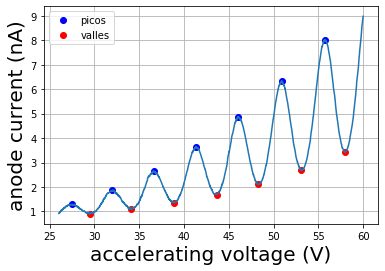

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


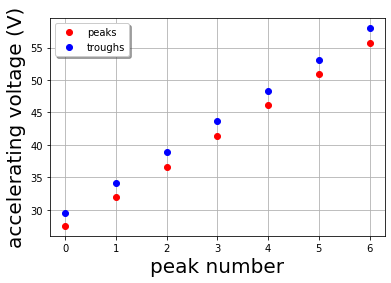

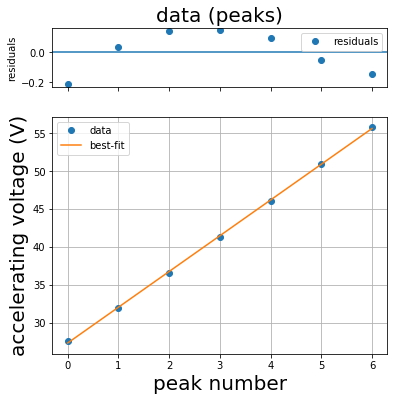

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


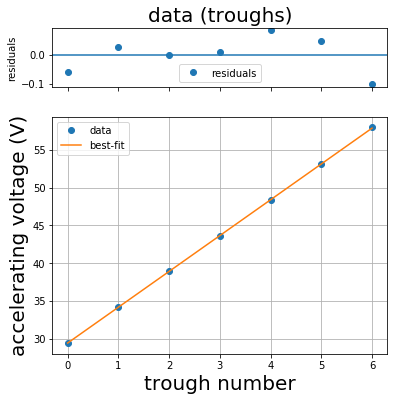

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego I	#	#	#	#	#


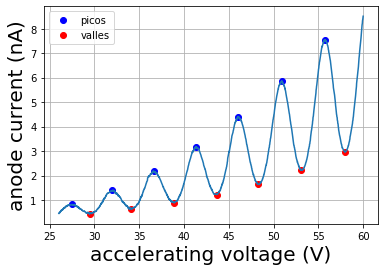

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


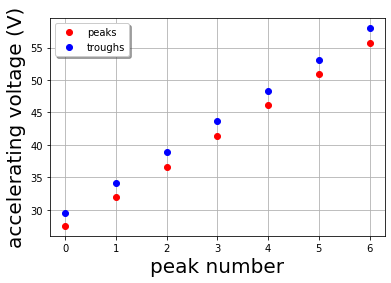

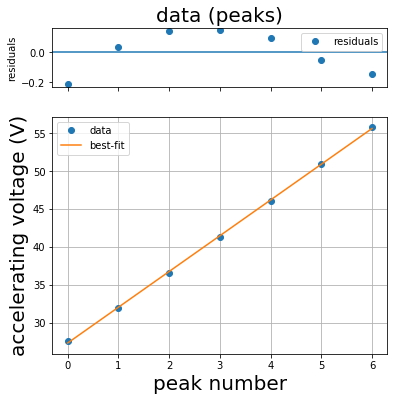

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


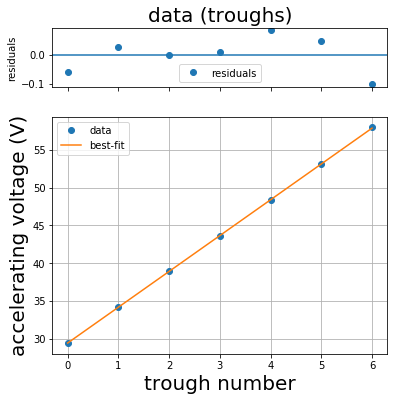

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego J	#	#	#	#	#


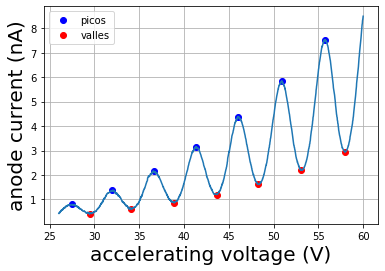

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


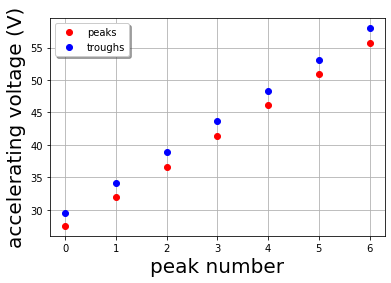

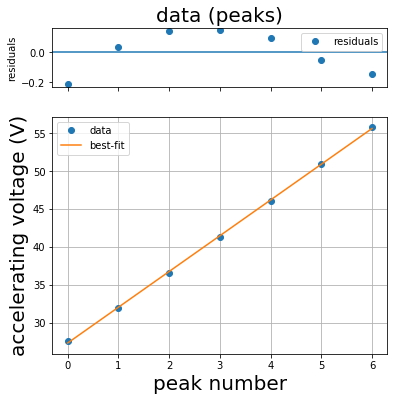

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


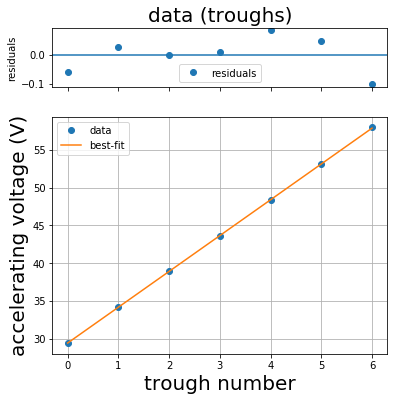

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego K	#	#	#	#	#


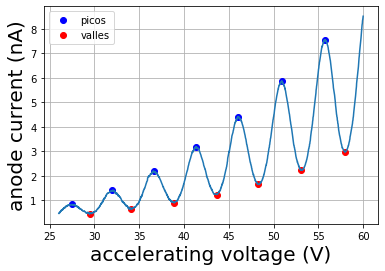

Average splitting (peaks): 4.705 +/- 0.050 V
Average splitting (troughs): 4.750 +/- 0.029 V
Average splitting (combined): 4.728 +/- 0.058 V


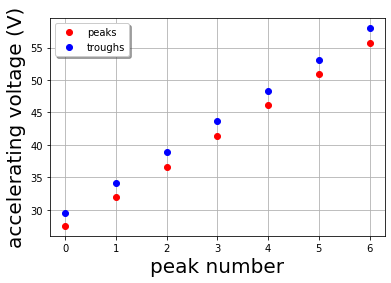

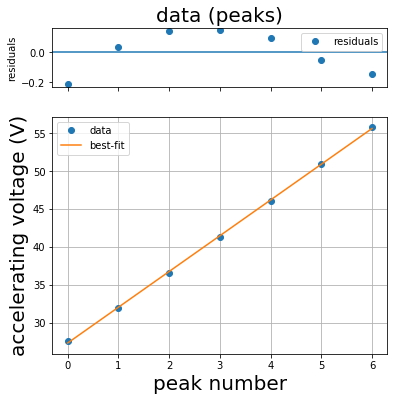

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.11948214
    reduced chi-square = 0.02389643
    Akaike info crit   = -24.4934895
    Bayesian info crit = -24.6016692
[[Variables]]
    slope:      4.71678571 +/- 0.02921376 (0.62%) (init = 1)
    intercept:  27.3053571 +/- 0.10533172 (0.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


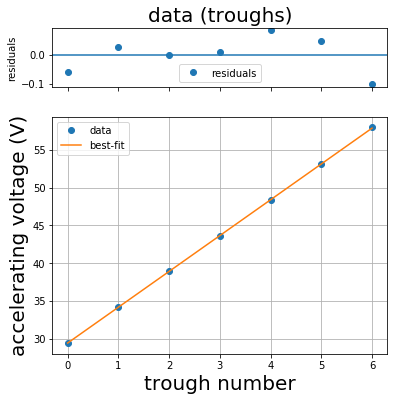

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.02337143
    reduced chi-square = 0.00467429
    Akaike info crit   = -35.9150581
    Bayesian info crit = -36.0232378
[[Variables]]
    slope:      4.74285714 +/- 0.01292048 (0.27%) (init = 1)
    intercept:  29.4114286 +/- 0.04658545 (0.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832
#	#	#	#	#	Calculos del juego L	#	#	#	#	#


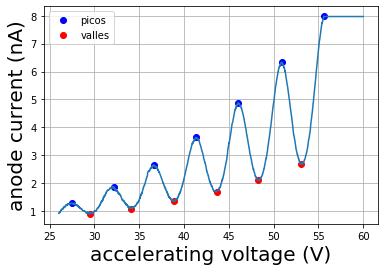

Average splitting (peaks): 4.680 +/- 0.048 V
Average splitting (troughs): 4.722 +/- 0.020 V
Average splitting (combined): 4.701 +/- 0.052 V


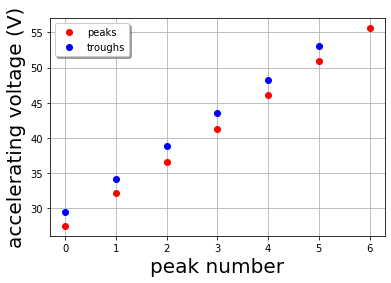

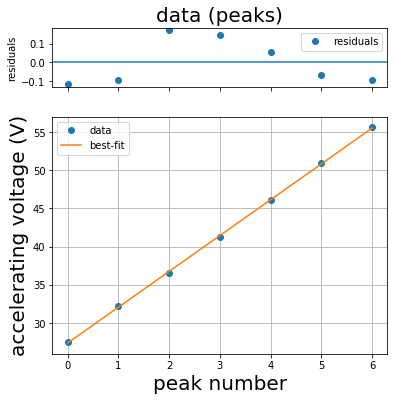

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.08921429
    reduced chi-square = 0.01784286
    Akaike info crit   = -26.5383697
    Bayesian info crit = -26.6465494
[[Variables]]
    slope:      4.68357143 +/- 0.02524371 (0.54%) (init = 1)
    intercept:  27.4035714 +/- 0.09101749 (0.33%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.832


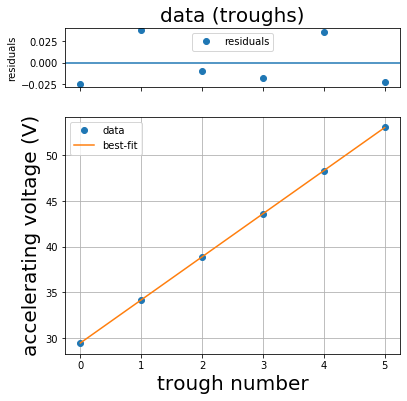

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 0.00416762
    reduced chi-square = 0.00104190
    Akaike info crit   = -39.6330191
    Bayesian info crit = -40.0495001
[[Variables]]
    slope:      4.72257143 +/- 0.00771605 (0.16%) (init = 1)
    intercept:  29.4452381 +/- 0.02336150 (0.08%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.826


In [7]:
for datos_extrac,i in zip(lista_de_datas_Hg,range(ord("A"),ord("L")+1)):
    calculos(datos=datos_extrac,Vmin=26,cercania=150,texto="Calculos del juego "+f"{chr(i)}")

<img src="imagen1.png">

# ATOMO DE NEON OBSERVACIONES

In [8]:
########## La parte de .apply(pd.to_numeric,errors='coerce') Es importante por que la lectura vota strings , pero yo
### quiero resultados numericos y por eso ".apply(pd.to_numeric,errors='coerce')" lo convierte a numerico

######### Referencias  
# https://stackoverflow.com/questions/45478070/pd-read-csv-gives-me-str-but-need-float

lista_de_datas_Ne = [] # la lista de datas
lista_de_letras = ["Ne7 UH=5V","Ne7A UH=5.5V","Ne6B UH=5V","Ne7C UH=4.5V","Ne7D UH=7V","Ne7E UH=5.2V","Ne7F UH=4.7V",
                   "Ne7G UH=6.5V","Ne7H UH=4.5V","Ne7L UH=5.7V","Ne7M UH=5.9V"]
data_neon = pd.read_csv("datos_neon\\Ne7.txt", sep="\t")
vol ,corr= data_neon.iloc[1:,0].to_numpy(float) ,data_neon.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neon.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonA = pd.read_csv("datos_neon\\Ne7A.txt", sep="\t")
volA ,corr_A= data_neonA.iloc[1:,0].to_numpy(float) ,data_neonA.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neon.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonB = pd.read_csv("datos_neon\\Ne7B.txt", sep="\t")
volB ,corr_B= data_neonB.iloc[2:,0].to_numpy(float) ,data_neonB.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonB.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonC = pd.read_csv("datos_neon\\Ne7C.txt", sep="\t")
volC ,corr_C= data_neonC.iloc[1:,0].to_numpy(float) ,data_neonC.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonC.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonD = pd.read_csv("datos_neon\\Ne7D.txt", sep="\t")
volD ,corr_D= data_neonD.iloc[1:,0].to_numpy(float) ,data_neonD.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonD.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonE = pd.read_csv("datos_neon\\Ne7E.txt", sep="\t")
volE ,corr_E= data_neonE.iloc[1:,0].to_numpy(float) ,data_neonE.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonE.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonF = pd.read_csv("datos_neon\\Ne7F.txt", sep="\t")
volF ,corr_F= data_neonF.iloc[1:,0].to_numpy(float) ,data_neonF.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonF.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonG = pd.read_csv("datos_neon\\Ne7G.txt", sep="\t")
volG ,corr_G= data_neonG.iloc[1:,0].to_numpy(float) ,data_neonG.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonG.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonH = pd.read_csv("datos_neon\\Ne7H.txt", sep="\t")
volH ,corr_H= data_neonH.iloc[1:,0].to_numpy(float) ,data_neonH.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonH.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonL = pd.read_csv("datos_neon\\Ne7L.txt", sep="\t")
volL ,corr_L= data_neonL.iloc[1:,0].to_numpy(float) ,data_neonL.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonL.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

data_neonM = pd.read_csv("datos_neon\\Ne7M.txt", sep="\t")
volM ,corr_M= data_neonM.iloc[1:,0].to_numpy(float) ,data_neonM.iloc[2:,1].to_numpy(float)
lista_de_datas_Ne.append(data_neonM.iloc[1:,[0,1]].reset_index(drop=True).apply(pd.to_numeric,errors='coerce'))

# Graficos de datos Neon

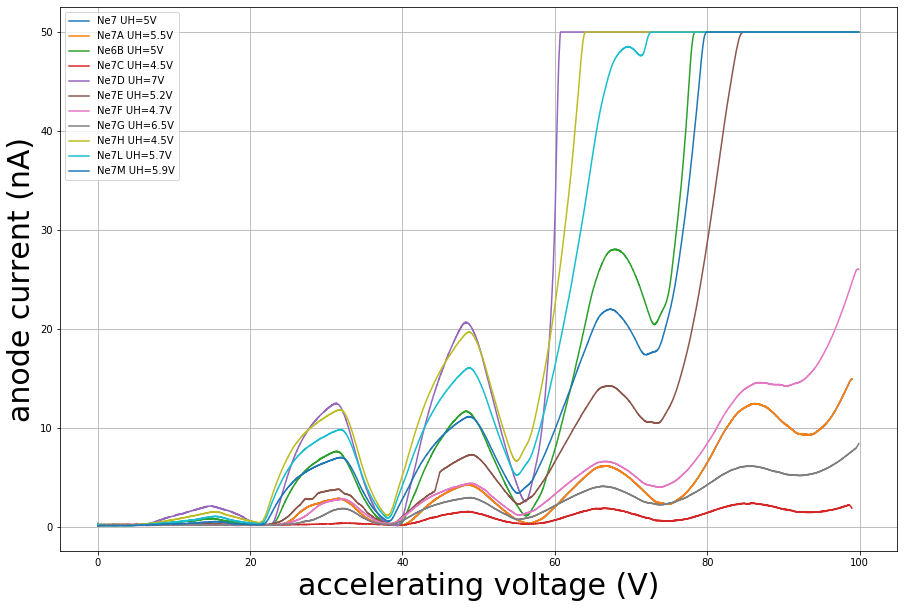

In [15]:
plt.figure(figsize=(15,10))
for datos,texto in zip(lista_de_datas_Ne,lista_de_letras):
    plt.plot(datos.iloc[0:,0],datos.iloc[0:,1],label=texto)

#### decoraciones 
plt.grid()
plt.xlabel('accelerating voltage (V)',fontsize=30)
plt.ylabel('anode current (nA)',fontsize=30)
plt.legend()
plt.show()

# Hacemos todos los calculos de los juegos de datos Neon

#	#	#	#	#	Calculos del juego Ne7 UH=5V	#	#	#	#	#


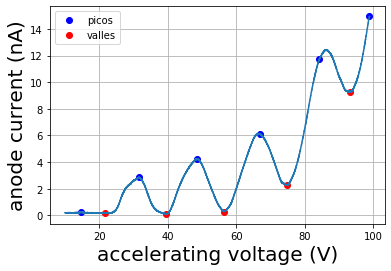

Average splitting (peaks): 16.846 +/- 0.489 V
Average splitting (troughs): 17.925 +/- 0.288 V
Average splitting (combined): 17.385 +/- 0.567 V


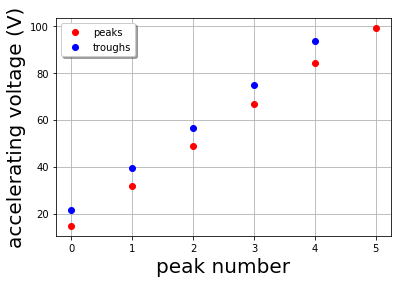

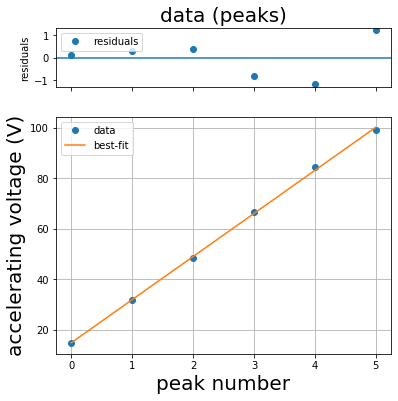

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 3.79639429
    reduced chi-square = 0.94909857
    Akaike info crit   = 1.25375365
    Bayesian info crit = 0.83727259
[[Variables]]
    slope:      17.0694286 +/- 0.23288238 (1.36%) (init = 1)
    intercept:  14.8514286 +/- 0.70508642 (4.75%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.826


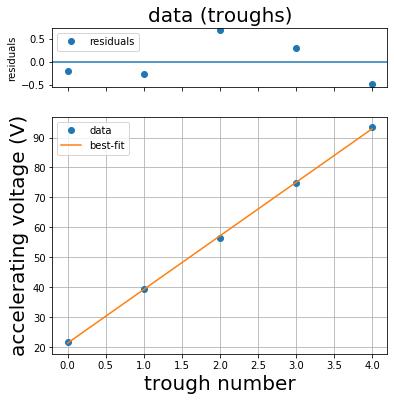

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 0.90924000
    reduced chi-square = 0.30308000
    Akaike info crit   = -4.52292053
    Bayesian info crit = -5.30404470
[[Variables]]
    slope:      17.8540000 +/- 0.17409193 (0.98%) (init = 1)
    intercept:  21.4720000 +/- 0.42643640 (1.99%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.816
#	#	#	#	#	Calculos del juego Ne7A UH=5.5V	#	#	#	#	#


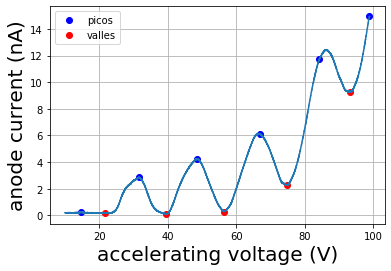

Average splitting (peaks): 16.846 +/- 0.489 V
Average splitting (troughs): 17.925 +/- 0.288 V
Average splitting (combined): 17.385 +/- 0.567 V


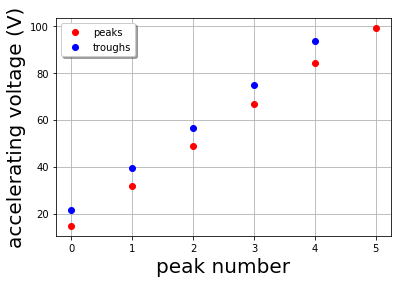

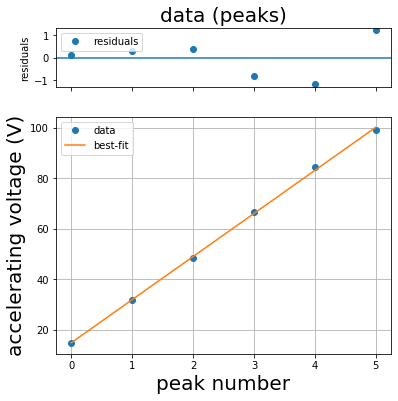

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 3.79639429
    reduced chi-square = 0.94909857
    Akaike info crit   = 1.25375365
    Bayesian info crit = 0.83727259
[[Variables]]
    slope:      17.0694286 +/- 0.23288238 (1.36%) (init = 1)
    intercept:  14.8514286 +/- 0.70508642 (4.75%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.826


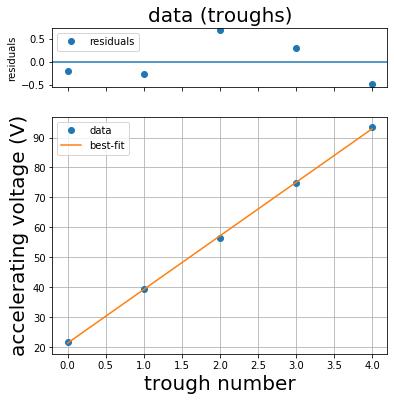

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 0.90924000
    reduced chi-square = 0.30308000
    Akaike info crit   = -4.52292053
    Bayesian info crit = -5.30404470
[[Variables]]
    slope:      17.8540000 +/- 0.17409193 (0.98%) (init = 1)
    intercept:  21.4720000 +/- 0.42643640 (1.99%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.816
#	#	#	#	#	Calculos del juego Ne6B UH=5V	#	#	#	#	#


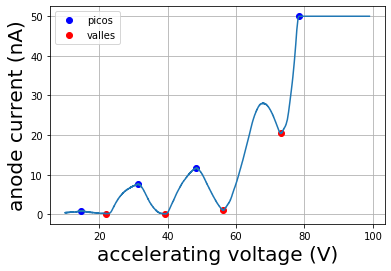

Average splitting (peaks): 21.197 +/- 3.152 V
Average splitting (troughs): 17.037 +/- 0.097 V
Average splitting (combined): 19.117 +/- 3.154 V


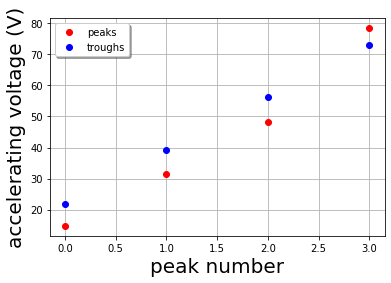

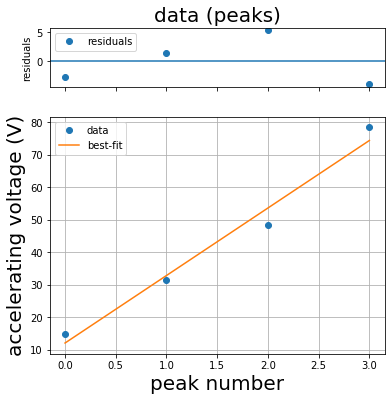

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 54.0728300
    reduced chi-square = 27.0364150
    Akaike info crit   = 14.4161499
    Bayesian info crit = 13.1887386
[[Variables]]
    slope:      20.7670000 +/- 2.32535654 (11.20%) (init = 1)
    intercept:  12.0520000 +/- 4.35034371 (36.10%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802


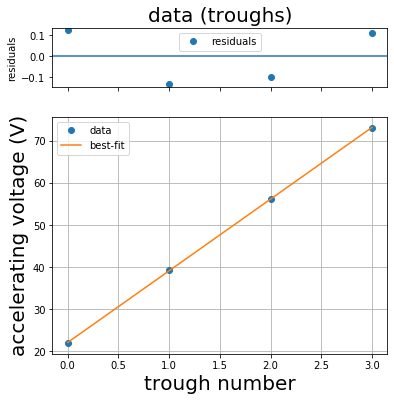

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 0.05583000
    reduced chi-square = 0.02791500
    Akaike info crit   = -13.0869531
    Bayesian info crit = -14.3143644
[[Variables]]
    slope:      17.0330000 +/- 0.07471947 (0.44%) (init = 1)
    intercept:  22.0930000 +/- 0.13978734 (0.63%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802
#	#	#	#	#	Calculos del juego Ne7C UH=4.5V	#	#	#	#	#


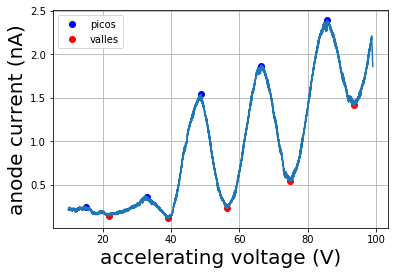

Average splitting (peaks): 17.633 +/- 0.601 V
Average splitting (troughs): 17.925 +/- 0.254 V
Average splitting (combined): 17.779 +/- 0.653 V


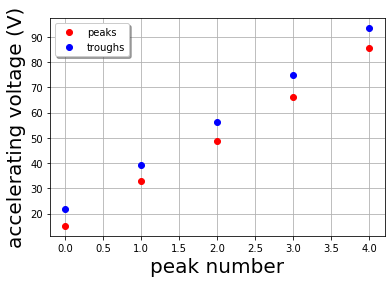

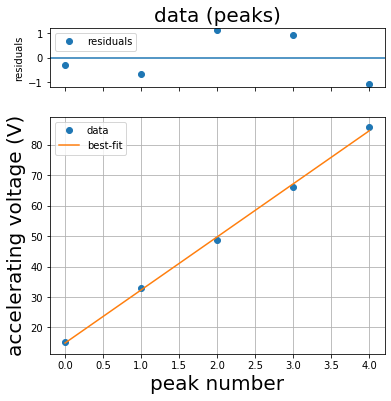

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 3.80272000
    reduced chi-square = 1.26757333
    Akaike info crit   = 2.63139344
    Bayesian info crit = 1.85026926
[[Variables]]
    slope:      17.4340000 +/- 0.35602995 (2.04%) (init = 1)
    intercept:  14.8900000 +/- 0.87209173 (5.86%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.816


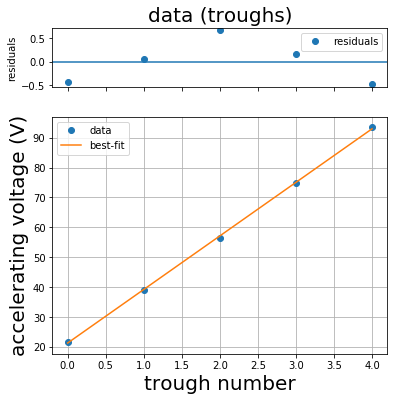

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 0.90423000
    reduced chi-square = 0.30141000
    Akaike info crit   = -4.55054719
    Bayesian info crit = -5.33167137
[[Variables]]
    slope:      17.9130000 +/- 0.17361163 (0.97%) (init = 1)
    intercept:  21.2980000 +/- 0.42525992 (2.00%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.816
#	#	#	#	#	Calculos del juego Ne7D UH=7V	#	#	#	#	#


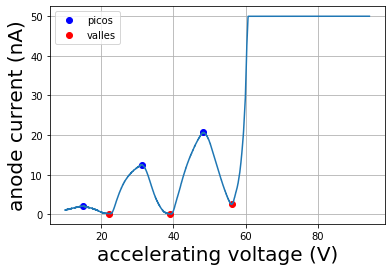

Average splitting (peaks): 16.640 +/- 0.202 V
Average splitting (troughs): 16.960 +/- 0.081 V
Average splitting (combined): 16.800 +/- 0.218 V


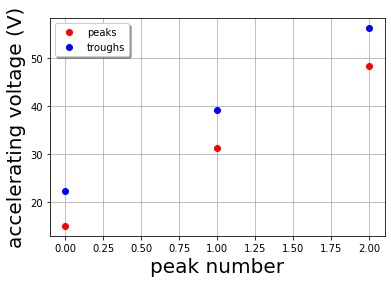

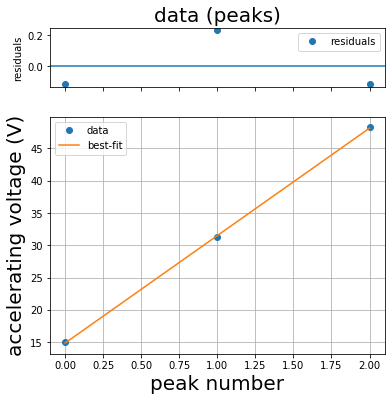

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 3
    # variables        = 2
    chi-square         = 0.08166667
    reduced chi-square = 0.08166667
    Akaike info crit   = -6.81116494
    Bayesian info crit = -8.61394036
[[Variables]]
    slope:      16.6400000 +/- 0.20207259 (1.21%) (init = 1)
    intercept:  14.8733333 +/- 0.26087460 (1.75%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.775


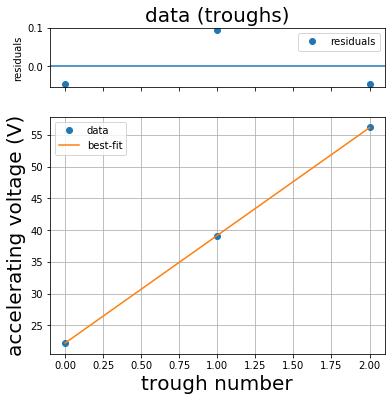

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 3
    # variables        = 2
    chi-square         = 0.01306667
    reduced chi-square = 0.01306667
    Akaike info crit   = -12.3089093
    Bayesian info crit = -14.1116848
[[Variables]]
    slope:      16.9600000 +/- 0.08082904 (0.48%) (init = 1)
    intercept:  22.2233333 +/- 0.10434984 (0.47%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.775
#	#	#	#	#	Calculos del juego Ne7E UH=5.2V	#	#	#	#	#


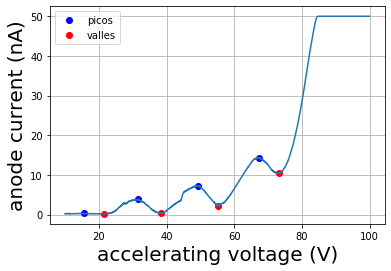

Average splitting (peaks): 17.200 +/- 0.428 V
Average splitting (troughs): 17.200 +/- 0.272 V
Average splitting (combined): 17.200 +/- 0.507 V


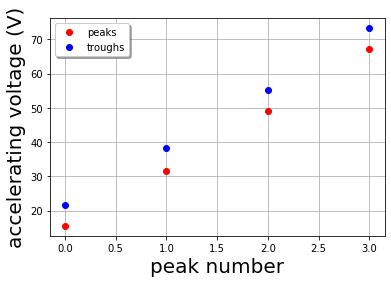

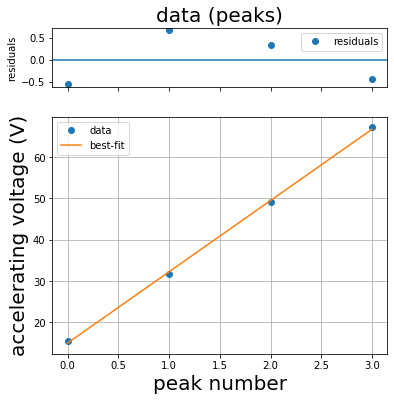

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 1.05832000
    reduced chi-square = 0.52916000
    Akaike info crit   = -1.31844646
    Bayesian info crit = -2.54585774
[[Variables]]
    slope:      17.2360000 +/- 0.32531830 (1.89%) (init = 1)
    intercept:  15.0160000 +/- 0.60861481 (4.05%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802


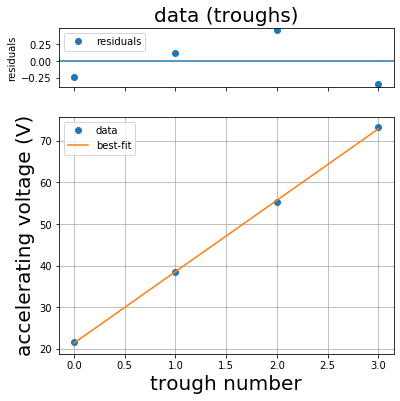

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 0.40383000
    reduced chi-square = 0.20191500
    Akaike info crit   = -5.17222257
    Bayesian info crit = -6.39963385
[[Variables]]
    slope:      17.1630000 +/- 0.20095522 (1.17%) (init = 1)
    intercept:  21.3930000 +/- 0.37595279 (1.76%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802
#	#	#	#	#	Calculos del juego Ne7F UH=4.7V	#	#	#	#	#


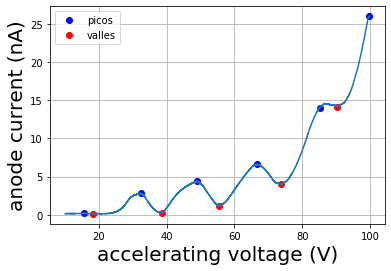

Average splitting (peaks): 16.874 +/- 0.528 V
Average splitting (troughs): 18.045 +/- 0.672 V
Average splitting (combined): 17.459 +/- 0.854 V


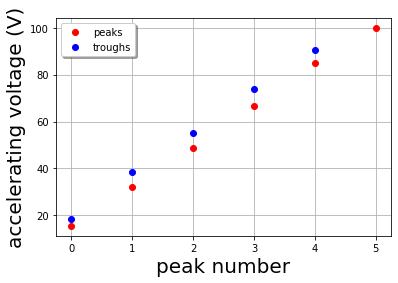

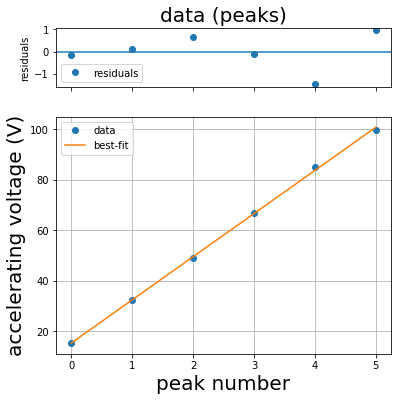

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 3.53053714
    reduced chi-square = 0.88263429
    Akaike info crit   = 0.81814333
    Bayesian info crit = 0.40166227
[[Variables]]
    slope:      17.0951429 +/- 0.22458015 (1.31%) (init = 1)
    intercept:  15.3271429 +/- 0.67995017 (4.44%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.826


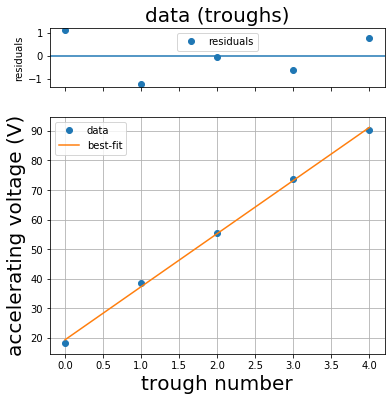

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 3.68659000
    reduced chi-square = 1.22886333
    Akaike info crit   = 2.47632000
    Bayesian info crit = 1.69519582
[[Variables]]
    slope:      17.9670000 +/- 0.35055147 (1.95%) (init = 1)
    intercept:  19.3340000 +/- 0.85867223 (4.44%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.816
#	#	#	#	#	Calculos del juego Ne7G UH=6.5V	#	#	#	#	#


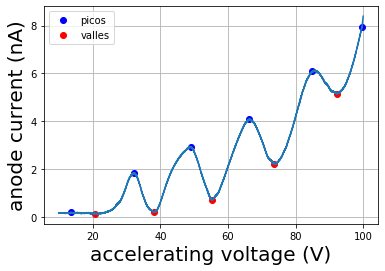

Average splitting (peaks): 17.164 +/- 0.567 V
Average splitting (troughs): 17.845 +/- 0.302 V
Average splitting (combined): 17.505 +/- 0.642 V


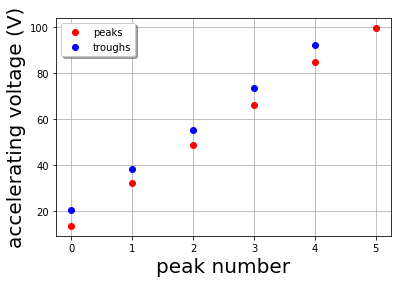

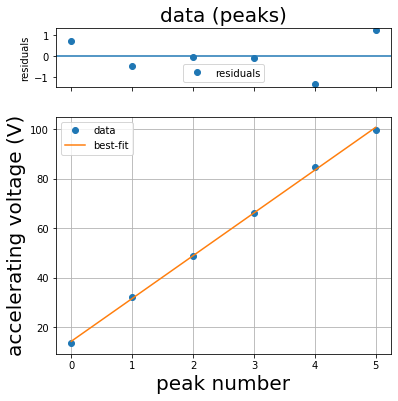

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 6
    # variables        = 2
    chi-square         = 4.03174857
    reduced chi-square = 1.00793714
    Akaike info crit   = 1.61464421
    Bayesian info crit = 1.19816315
[[Variables]]
    slope:      17.2702857 +/- 0.23999252 (1.39%) (init = 1)
    intercept:  14.3942857 +/- 0.72661343 (5.05%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.826


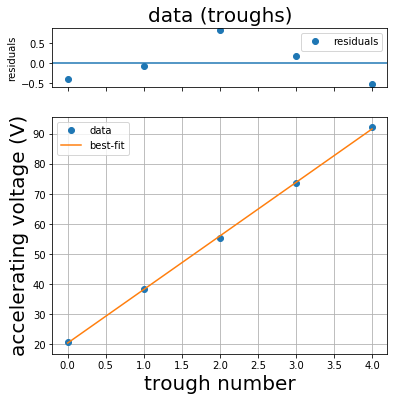

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 2
    chi-square         = 1.15407000
    reduced chi-square = 0.38469000
    Akaike info crit   = -3.33071544
    Bayesian info crit = -4.11183961
[[Variables]]
    slope:      17.8150000 +/- 0.19613516 (1.10%) (init = 1)
    intercept:  20.3760000 +/- 0.48043106 (2.36%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.816
#	#	#	#	#	Calculos del juego Ne7H UH=4.5V	#	#	#	#	#


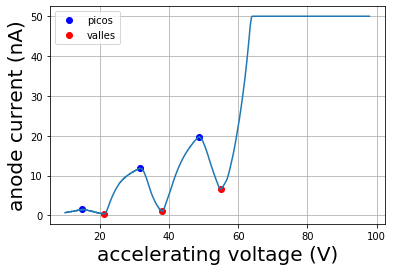

Average splitting (peaks): 16.825 +/- 0.043 V
Average splitting (troughs): 16.895 +/- 0.014 V
Average splitting (combined): 16.860 +/- 0.046 V


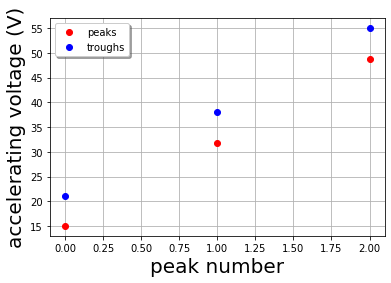

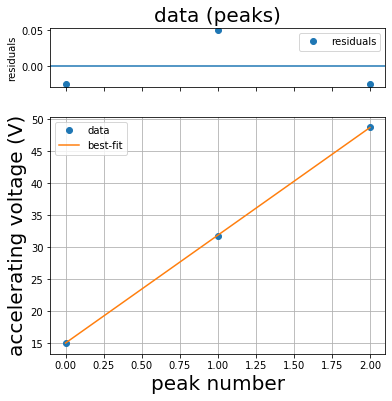

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 3
    # variables        = 2
    chi-square         = 0.00375000
    reduced chi-square = 0.00375000
    Akaike info crit   = -16.0538352
    Bayesian info crit = -17.8566106
[[Variables]]
    slope:      16.8250000 +/- 0.04330127 (0.26%) (init = 1)
    intercept:  15.0150000 +/- 0.05590170 (0.37%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.775


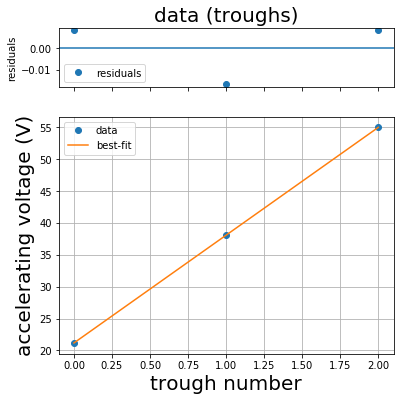

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 3
    # variables        = 2
    chi-square         = 4.1667e-04
    reduced chi-square = 4.1667e-04
    Akaike info crit   = -22.6455089
    Bayesian info crit = -24.4482843
[[Variables]]
    slope:      16.8950000 +/- 0.01443376 (0.09%) (init = 1)
    intercept:  21.1783333 +/- 0.01863390 (0.09%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.775
#	#	#	#	#	Calculos del juego Ne7L UH=5.7V	#	#	#	#	#


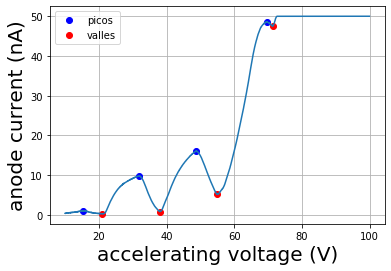

Average splitting (peaks): 18.090 +/- 1.039 V
Average splitting (troughs): 16.750 +/- 0.163 V
Average splitting (combined): 17.420 +/- 1.052 V


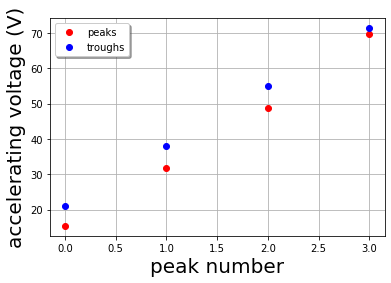

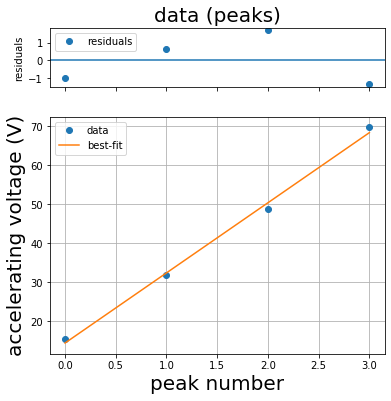

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 6.06823000
    reduced chi-square = 3.03411500
    Akaike info crit   = 5.66709041
    Bayesian info crit = 4.43967914
[[Variables]]
    slope:      17.9730000 +/- 0.77898844 (4.33%) (init = 1)
    intercept:  14.4080000 +/- 1.45735394 (10.11%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802


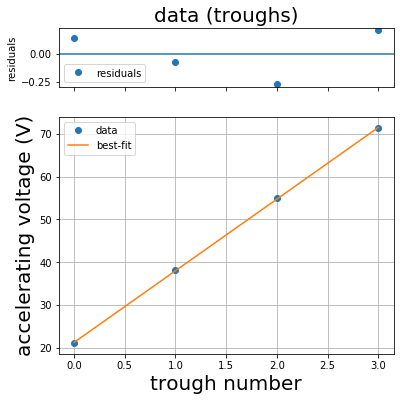

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 0.14428000
    reduced chi-square = 0.07214000
    Akaike info crit   = -9.28917514
    Bayesian info crit = -10.5165864
[[Variables]]
    slope:      16.7720000 +/- 0.12011661 (0.72%) (init = 1)
    intercept:  21.1920000 +/- 0.22471760 (1.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802
#	#	#	#	#	Calculos del juego Ne7M UH=5.9V	#	#	#	#	#


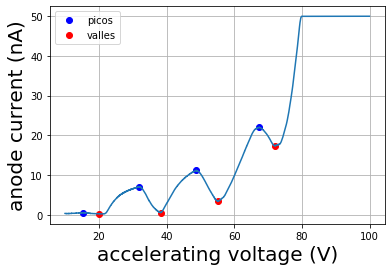

Average splitting (peaks): 17.307 +/- 0.455 V
Average splitting (troughs): 17.307 +/- 0.312 V
Average splitting (combined): 17.307 +/- 0.552 V


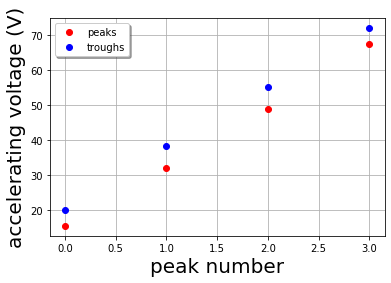

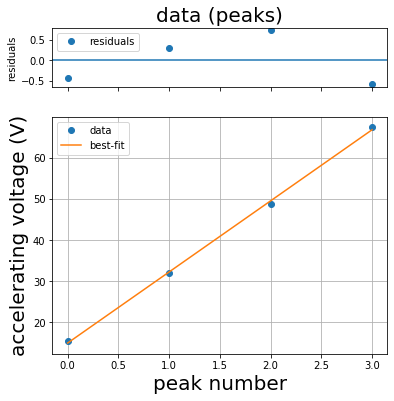

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 1.17347000
    reduced chi-square = 0.58673500
    Akaike info crit   = -0.90531676
    Bayesian info crit = -2.13272804
[[Variables]]
    slope:      17.2590000 +/- 0.34255949 (1.98%) (init = 1)
    intercept:  15.0040000 +/- 0.64087012 (4.27%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802


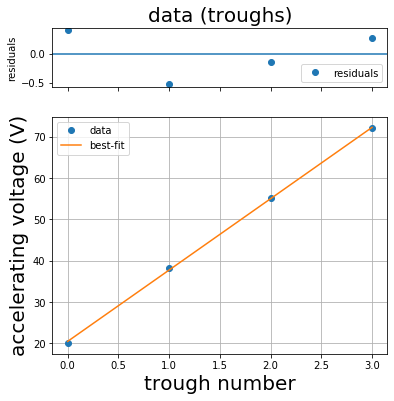

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 2
    chi-square         = 0.53082000
    reduced chi-square = 0.26541000
    Akaike info crit   = -4.07850664
    Bayesian info crit = -5.30591792
[[Variables]]
    slope:      17.2640000 +/- 0.23039531 (1.33%) (init = 1)
    intercept:  20.4690000 +/- 0.43103016 (2.11%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.802


In [10]:
for datos_extrac,texto in zip(lista_de_datas_Ne,lista_de_letras):
    calculos(datos=datos_extrac,Vmin=10,cercania=600,texto="Calculos del juego "+f"{texto}")